Matplotlib基础教程（1.3）图像处理

# 一、载入模块

载入matplotlib.image图像处理模块：

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg

初始化数据：

In [2]:
mpl.rcParams.update({
    'font.family':'STSong',
    'figure.dpi':100,
    'mathtext.fontset':'stix'
})

## 1.导入到数组

imread可以快速把图像的数据导入到ndarray数组中。

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as mpimg
mpl.rcParams.update({
    'font.family':'STSong',
    'figure.dpi':100,
    'mathtext.fontset':'stix'
})
img = mpimg.imread('F:\\Project_地聚物混凝土\\5.8.PY\\bug.png')
print(img)

[[[0.41568628 0.41568628 0.41568628 1.        ]
  [0.41568628 0.41568628 0.41568628 1.        ]
  [0.41568628 0.41568628 0.41568628 1.        ]
  ...
  [0.42745098 0.42745098 0.42745098 1.        ]
  [0.42745098 0.42745098 0.42745098 1.        ]
  [0.42745098 0.42745098 0.42745098 1.        ]]

 [[0.41568628 0.41568628 0.41568628 1.        ]
  [0.41568628 0.41568628 0.41568628 1.        ]
  [0.41568628 0.41568628 0.41568628 1.        ]
  ...
  [0.42745098 0.42745098 0.42745098 1.        ]
  [0.42745098 0.42745098 0.42745098 1.        ]
  [0.42745098 0.42745098 0.42745098 1.        ]]

 [[0.41960785 0.41960785 0.41960785 1.        ]
  [0.41960785 0.41960785 0.41960785 1.        ]
  [0.41960785 0.41960785 0.41960785 1.        ]
  ...
  [0.43529412 0.43529412 0.43529412 1.        ]
  [0.43137255 0.43137255 0.43137255 1.        ]
  [0.43137255 0.43137255 0.43137255 1.        ]]

 ...

 [[0.43529412 0.43529412 0.43529412 1.        ]
  [0.43529412 0.43529412 0.43529412 1.        ]
  [0.43529

## 2.数据说明

上图中，Matplotlib将每个通道的8位数据重新缩放为 0.0 和 1.0 之间的浮点数据。

Matplotlib 绘图可以处理 float32 和 uint8（0~255），但 PNG 以外的任何格式仅限于 uint8 数据。

RGB图像：每个内部列表有 3 个值，代表R、G、B，支持 float32 和 uint8 数据类型。
RGBA图像：每个内部列表有 4 个值，代表R、G、B、A（透明度），支持 float32 和 uint8 数据类型。
灰度图像：每个内部列表有 1 个值，代表灰度，仅支持 float32 数据类型。

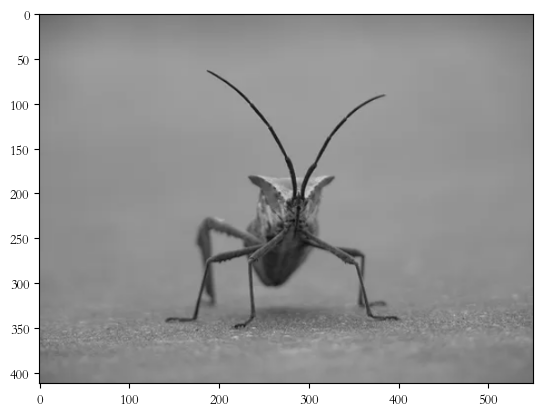

In [3]:
imgplot = plt.imshow(img)

 2.伪彩渲染

伪彩渲染仅与单通道、灰度、亮度图像相关。目前图像为 RGB ，可以从数据中选择一个通道，即可完成：

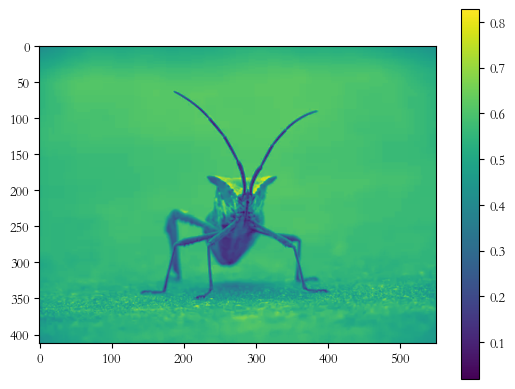

In [4]:
lum_img = img[:, :, 0]
plt.imshow(lum_img)
plt.colorbar()   # 右侧添加

在命令中更改色图：

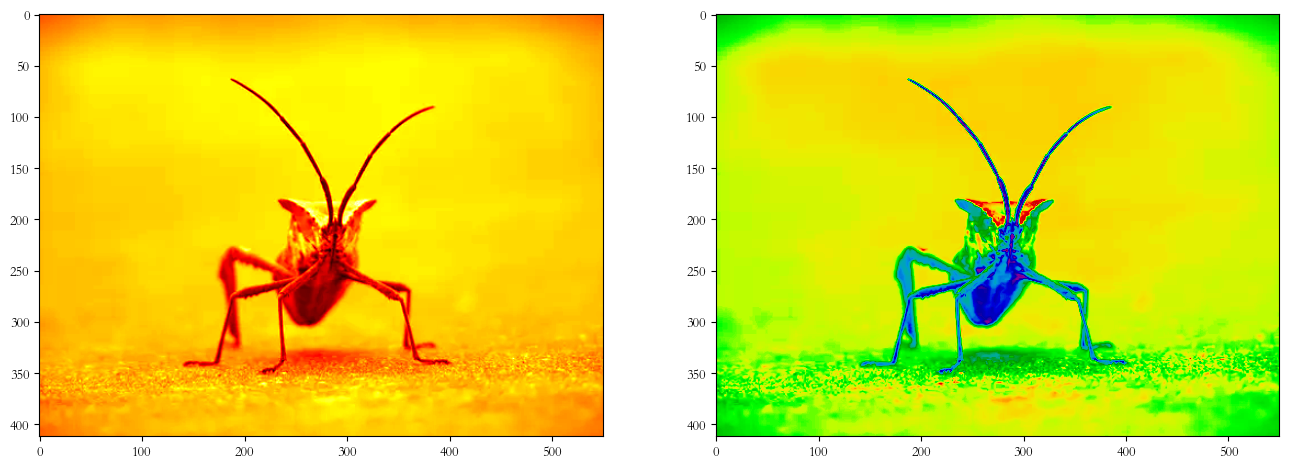

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (16, 9))
ax1.imshow(lum_img, cmap="hot")
img2 = ax2.imshow(lum_img)
img2.set_cmap('nipy_spectral')

## 3.数值分布

要查看数值的分布，可以使用 hist 直方图。

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00, 5.0000e+00,
        5.0000e+00, 5.0000e+00, 7.0000e+00, 1.1000e+01, 1.3000e+01,
        1.2000e+01, 2.2000e+01, 1.5000e+01, 2.4000e+01, 3.2000e+01,
        3.6000e+01, 3.9000e+01, 4.0000e+01, 4.1000e+01, 4.8000e+01,
        5.7000e+01, 5.9000e+01, 6.7000e+01, 6.6000e+01, 8.5000e+01,
        9.9000e+01, 1.2100e+02, 1.5900e+02, 1.1500e+02, 1.4400e+02,
        1.1500e+02, 1.6800e+02, 1.1500e+02, 1.5800e+02, 1.7300e+02,
        1.4100e+02, 1.1500e+02, 1.4800e+02, 1.6300e+02, 1.1900e+02,
        1.4200e+02, 1.4400e+02, 1.2200e+02, 9.7000e+01, 1.5600e+02,
        1.3400e+02, 1.1400e+02, 1.4800e+02, 1.7100e+02, 1.2300e+02,
        1.3900e+02, 1.4400e+02, 1.2400e+02, 1.4800e+02, 1.6000e+02,
        1.7200e+02, 1.6200e+02, 1.8700e+02, 1.7300e+02, 1.5600e+02,
        1.2700e+02, 1.3600e+02, 1.6100e+02, 1.56

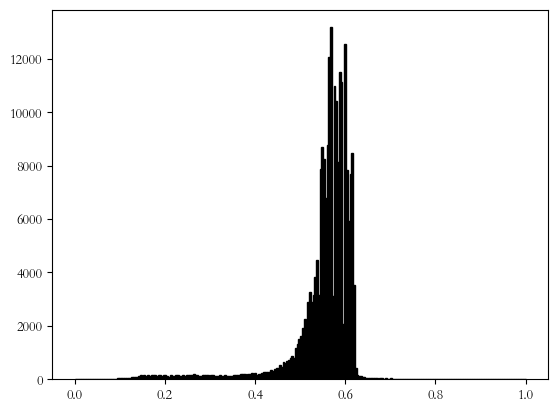

In [8]:
plt.hist(lum_img.ravel(),   # 展开通道的数组
         bins=256,          # 分成256区间
         range=(0.0, 1.0),  # 设置分布范围
         fc='k', ec='k')    # 设置颜色

让我们调整上限，以便有效地“放大”直方图的有效部分。

通过将 clim 参数传递给 imshow，也可以通过调用图像绘图对象的 set_clim() 方法来完成。

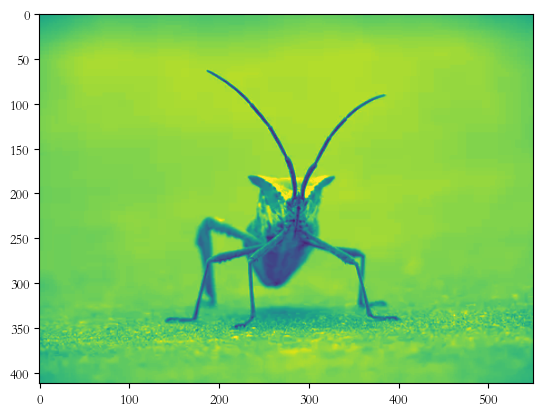

In [9]:
imgplot = plt.imshow(lum_img, clim=(0.0, 0.7))   # 调整上下限

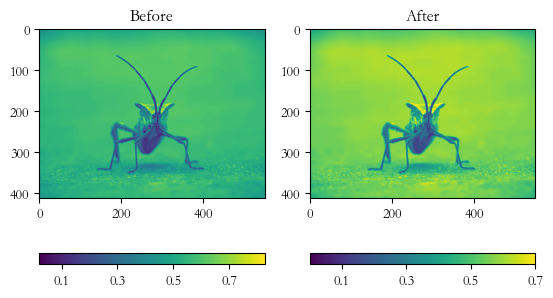

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(lum_img)
ax.set_title('Before')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(lum_img)
imgplot.set_clim(0.0, 0.7)   # 调整上下限
ax.set_title('After')
plt.colorbar(ticks=[0.1, 0.3, 0.5, 0.7], orientation='horizontal')

## 4.像素插值

当我们改变图像大小的时候，会丢失一部分数据，此时往往需要插值来调整图像的视觉感官。

通常使用 Pillow 模块来调整图像大小。

In [11]:
from PIL import Image

img = Image.open('C:\\Users\\steph\\Documents\\python\\stinkbug.png')
img.thumbnail((64, 64), Image.ANTIALIAS)  # 调整图像大小
imgplot = plt.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\steph\\Documents\\python\\stinkbug.png'